# Install Packages

In [8]:
!pip install psycopg2-binary
!pip install --upgrade SQLAlchemy

# Load Libraries


---


In [9]:
import os
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json


# Task 1- Project Setup and Data Extraction

In [10]:
DATABASE_URL = "postgresql://u8g6pgr3nc1dqc:pe8f0029474e397807d8d16b7feb997387b30dbfc8669bda2164bc631c6593fee@ec2-34-236-111-217.compute-1.amazonaws.com:5432/d42jr442v2dujb"
conn = psycopg2.connect(DATABASE_URL, sslmode='require')

In [11]:
try:
    cursor = conn.cursor()

    # Query to retrieve all table names in the current database
    query = """
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public'  -- You can specify the schema if needed
    """

    cursor.execute(query)

    # Fetch all table names
    table_names = cursor.fetchall()

    # Print the table names
    for table in table_names:
        print(table[0])

except (Exception, psycopg2.Error) as error:
    print("Error while connecting to PostgreSQL:", error)

pg_stat_statements_info
pg_stat_statements
restaurants
customer_accounts
business
inspector
result_2
ip_enriched
customer_prep
table_name


In [12]:
query = '''
select * 
from customer_accounts;'''

cursor.execute(query)

#Return Table
customer_accounts = pd.DataFrame(cursor.fetchall())

column_names = [desc[0] for desc in cursor.description]
customer_accounts.columns = column_names
customer_accounts

,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,ip_address,email_domain,business_state,credit_score,EVENT_LABEL
0,34.0,64.0,11.0,11638.0,True,99.193.119.75,gmail.com,IA,104.0,legit
1,27.0,35.0,7.0,11525.0,True,193.63.140.47,gmail.com,NH,359.0,legit
2,44.0,38.0,10.0,9335.0,True,79.182.139.29,gmail.com,NY,848.0,legit
3,37.0,55.0,11.0,11521.0,True,207.148.124.204,gmail.com,NH,202.0,legit
4,39.0,35.0,9.0,11982.0,False,68.6.93.151,hotmail.com,AK,739.0,legit
...,...,...,...,...,...,...,...,...,...,...
9945,27.0,84.0,8.0,12707.0,True,79.182.139.29,gmail.com,GA,807.0,legit
9946,30.0,54.0,10.0,10972.0,True,79.182.139.29,gmail.com,SD,143.0,fraud
9947,25.0,46.0,11.0,8657.0,True,185.48.24.245,gmail.com,CT,846.0,legit
9948,29.0,81.0,10.0,9324.0,True,206.10.194.143,gmail.com,NJ,344.0,legit


In [13]:
#customer_accounts.to_excel('customer_accounts.xlsx', index=False)

In [15]:
customer_accounts = pd.read_excel('customer_accounts.xlsx')
customer_accounts

,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,ip_address,email_domain,business_state,credit_score,EVENT_LABEL
0,34,64,11,11638,True,99.193.119.75,gmail.com,IA,104,legit
1,27,35,7,11525,True,193.63.140.47,gmail.com,NH,359,legit
2,44,38,10,9335,True,79.182.139.29,gmail.com,NY,848,legit
3,37,55,11,11521,True,207.148.124.204,gmail.com,NH,202,legit
4,39,35,9,11982,False,68.6.93.151,hotmail.com,AK,739,legit
...,...,...,...,...,...,...,...,...,...,...
9945,27,84,8,12707,True,79.182.139.29,gmail.com,GA,807,legit
9946,30,54,10,10972,True,79.182.139.29,gmail.com,SD,143,fraud
9947,25,46,11,8657,True,185.48.24.245,gmail.com,CT,846,legit
9948,29,81,10,9324,True,206.10.194.143,gmail.com,NJ,344,legit


# Task 2- Data Enrichment

### API Call

In [16]:
customer_accounts['ip_address'].nunique()

79

In [17]:
unique_ip = list(customer_accounts['ip_address'].unique())

In [18]:
df_ip = pd.DataFrame({'Ip Addresses': unique_ip})

In [19]:
from time import sleep
df=df_ip.copy()
# Function to fetch data for an IP address
def fetch_ip_data(ip_address):
    sleep(1)
    # Define the API endpoint
    url = f"https://freeipapi.com/api/json/{ip_address}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for IP: {ip_address}. Status Code: {response.status_code}")
        return {}

# Loop through IP addresses in the DataFrame
for idx, row in df.iterrows():
    ip_data = fetch_ip_data(row['Ip Addresses'])
    for key, value in ip_data.items():
        # If this key/column doesn't exist in the DataFrame, create it
        if key not in df.columns:
            df[key] = None
        df.at[idx, key] = value

# Display the updated DataFrame
df

,Ip Addresses,ipVersion,ipAddress,latitude,longitude,countryName,countryCode,timeZone,zipCode,cityName,regionName,continent,continentCode
0,99.193.119.75,4,99.193.119.75,33.922234,-118.405518,United States of America,US,-07:00,90245,El Segundo,California,Americas,AM
1,193.63.140.47,4,193.63.140.47,51.6021,-3.34211,United Kingdom of Great Britain and Northern I...,GB,+01:00,CF37,Pontypridd,Wales,Europe,EU
2,79.182.139.29,4,79.182.139.29,30.60944,34.801109,Israel,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS
3,207.148.124.204,4,207.148.124.204,1.289987,103.850281,Singapore,SG,+08:00,179431,Singapore,Singapore,Asia,AS
4,68.6.93.151,4,68.6.93.151,34.420883,-119.698311,United States of America,US,-07:00,93101,Santa Barbara,California,Americas,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,82.197.167.230,4,82.197.167.230,47.500477,8.749907,Switzerland,CH,+02:00,8411,Winterthur,Zurich,Europe,EU
75,168.85.109.11,4,168.85.109.11,35.9216,-84.176025,United States of America,US,-04:00,37932,Knoxville,Tennessee,Americas,AM
76,44.21.77.55,4,44.21.77.55,32.800457,-117.171066,United States of America,US,-07:00,92111,San Diego,California,Americas,AM
77,106.45.227.122,4,106.45.227.122,38.468239,106.272598,China,CN,+08:00,750001,Yinchuan,Ningxia Huizu,Asia,AS


In [20]:
customer_accounts_enriched = customer_accounts.merge(df, left_on = 'ip_address', right_on = 'ipAddress', how = 'left')

In [21]:
customer_accounts_enriched.drop('Ip Addresses', axis=1).to_excel('customer_accounts_enriched.xlsx', index=False)

In [22]:
customer_accounts_enriched

,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,ip_address,email_domain,business_state,credit_score,EVENT_LABEL,...,latitude,longitude,countryName,countryCode,timeZone,zipCode,cityName,regionName,continent,continentCode
0,34,64,11,11638,True,99.193.119.75,gmail.com,IA,104,legit,...,33.922234,-118.405518,United States of America,US,-07:00,90245,El Segundo,California,Americas,AM
1,27,35,7,11525,True,193.63.140.47,gmail.com,NH,359,legit,...,51.6021,-3.34211,United Kingdom of Great Britain and Northern I...,GB,+01:00,CF37,Pontypridd,Wales,Europe,EU
2,44,38,10,9335,True,79.182.139.29,gmail.com,NY,848,legit,...,30.60944,34.801109,Israel,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS
3,37,55,11,11521,True,207.148.124.204,gmail.com,NH,202,legit,...,1.289987,103.850281,Singapore,SG,+08:00,179431,Singapore,Singapore,Asia,AS
4,39,35,9,11982,False,68.6.93.151,hotmail.com,AK,739,legit,...,34.420883,-119.698311,United States of America,US,-07:00,93101,Santa Barbara,California,Americas,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,27,84,8,12707,True,79.182.139.29,gmail.com,GA,807,legit,...,30.60944,34.801109,Israel,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS
9946,30,54,10,10972,True,79.182.139.29,gmail.com,SD,143,fraud,...,30.60944,34.801109,Israel,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS
9947,25,46,11,8657,True,185.48.24.245,gmail.com,CT,846,legit,...,41.01384,28.949659,Turkey,TR,+03:00,34080,Istanbul,Istanbul,Asia,AS
9948,29,81,10,9324,True,206.10.194.143,gmail.com,NJ,344,legit,...,41.8834,-87.6436,United States of America,US,-05:00,60661,Chicago,Illinois,Americas,AM


# Task 3- Data Loading

In [ ]:
#customer_accounts_enriched.to_csv(new_customer_accounts)
#customer_accounts_enriched.to_csv("new_customer_accounts.csv",index=False)

In [23]:
from sqlalchemy import create_engine
!pip install mysqlclient
# creata a database assignment_5 first

# Database connection settings
#username = 'dbUser'
#password = 'Waffle!5'
#host = 'localhost'
#port = '3306'
#database = 'assignment_5'

# Create a connection to the database using SQLAlchemy
#engine = create_engine(f"mysql+mysqldb://{username}:{password}@{host}:{port}/{database}")

# Export DataFrame to MySQL
#customer_accounts_enriched.to_sql('new_customer_prep', con=engine, index=False, if_exists='replace')

In [24]:
import sqlalchemy as sa
username = 'dbuser'
password = 'Waffle!5'
host = 'localhost'
database = 'assignment_5'

try:
    # Create a database connection using SQLAlchemy
    engine = sa.create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')
    print("Connected!")
except Exception as e:
    print(f"Not connected! Error: {e}")

Connected!


In [ ]:
#customer_accounts_enriched.to_sql('new_customer_prep', con=engine, index=False, if_exists='replace')

# Task 4- Train a Classification Model

In [25]:
# drop unnecessary columns
#df.drop(['DURATION'], axis=1, inplace=True)
# convert diagnosis variable to numerical (optional)
customer_accounts_enriched['EVENT_LABEL'] = customer_accounts_enriched['EVENT_LABEL'].apply(lambda x: 1 if x == 'legit' else 0)
# Convert response from an integer to a categorical variable
customer_accounts_enriched['EVENT_LABEL'] = customer_accounts_enriched['EVENT_LABEL'].astype('category')
customer_accounts_enriched.head()


,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,ip_address,email_domain,business_state,credit_score,EVENT_LABEL,...,latitude,longitude,countryName,countryCode,timeZone,zipCode,cityName,regionName,continent,continentCode
0,34,64,11,11638,True,99.193.119.75,gmail.com,IA,104,1,...,33.922234,-118.405518,United States of America,US,-07:00,90245,El Segundo,California,Americas,AM
1,27,35,7,11525,True,193.63.140.47,gmail.com,NH,359,1,...,51.6021,-3.34211,United Kingdom of Great Britain and Northern I...,GB,+01:00,CF37,Pontypridd,Wales,Europe,EU
2,44,38,10,9335,True,79.182.139.29,gmail.com,NY,848,1,...,30.60944,34.801109,Israel,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS
3,37,55,11,11521,True,207.148.124.204,gmail.com,NH,202,1,...,1.289987,103.850281,Singapore,SG,+08:00,179431,Singapore,Singapore,Asia,AS
4,39,35,9,11982,False,68.6.93.151,hotmail.com,AK,739,1,...,34.420883,-119.698311,United States of America,US,-07:00,93101,Santa Barbara,California,Americas,AM


In [26]:
customer_accounts_enriched.columns

Index(['email_age', 'customer_tenure', 'balance_inqury_count',
       'balance_current_amt', 'current_customer', 'ip_address', 'email_domain',
       'business_state', 'credit_score', 'EVENT_LABEL', 'Ip Addresses',
       'ipVersion', 'ipAddress', 'latitude', 'longitude', 'countryName',
       'countryCode', 'timeZone', 'zipCode', 'cityName', 'regionName',
       'continent', 'continentCode'],
      dtype='object')

In [27]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

C:\Users\nikla\AppData\Local\Temp\ipykernel_25424\1729996875.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [28]:
customer_accounts_enriched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 0 to 9949
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   email_age             9950 non-null   int64   
 1   customer_tenure       9950 non-null   int64   
 2   balance_inqury_count  9950 non-null   int64   
 3   balance_current_amt   9950 non-null   int64   
 4   current_customer      9950 non-null   bool    
 5   ip_address            9950 non-null   object  
 6   email_domain          9950 non-null   object  
 7   business_state        9950 non-null   object  
 8   credit_score          9950 non-null   int64   
 9   EVENT_LABEL           9950 non-null   category
 10  Ip Addresses          9950 non-null   object  
 11  ipVersion             9950 non-null   object  
 12  ipAddress             9950 non-null   object  
 13  latitude              9950 non-null   object  
 14  longitude             9950 non-null   object  
 15  coun

In [29]:
# split the data into training and testing sets
X = customer_accounts_enriched.drop(['EVENT_LABEL'], axis=1)
X = customer_accounts_enriched[['email_age', 'customer_tenure', 'balance_inqury_count',
       'balance_current_amt', 'current_customer', 'ip_address', 'email_domain',
       'business_state', 'credit_score',
       'ipVersion', 'latitude', 'longitude', 'countryName',
       'countryCode', 'timeZone', 'zipCode', 'cityName', 'regionName',
       'continent', 'continentCode']]
X = pd.get_dummies(X, columns=['ip_address', "email_domain", "business_state", "ipVersion",'latitude', 'longitude', 'countryName',
       'countryCode', 'timeZone', 'zipCode', 'cityName', 'regionName',
       'continent', 'continentCode'], drop_first=True)

y = customer_accounts_enriched['EVENT_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 773 to 7270
Columns: 533 entries, email_age to continentCode_EU
dtypes: bool(1), int64(5), uint8(527)
memory usage: 3.8 MB
<class 'pandas.core.series.Series'>
Int64Index: 6965 entries, 773 to 7270
Series name: EVENT_LABEL
Non-Null Count  Dtype   
--------------  -----   
6965 non-null   category
dtypes: category(1)
memory usage: 61.3 KB


In [30]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)



DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

In [31]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [32]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8775
Precision: 0.8816
Recall.  : 0.9764

 -- test set -- 
Accuracy : 0.8717
Precision: 0.8774
Recall.  : 0.9737


In [33]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[ 731  130]
 [ 723 5381]]
[[ 305   62]
 [ 321 2297]]


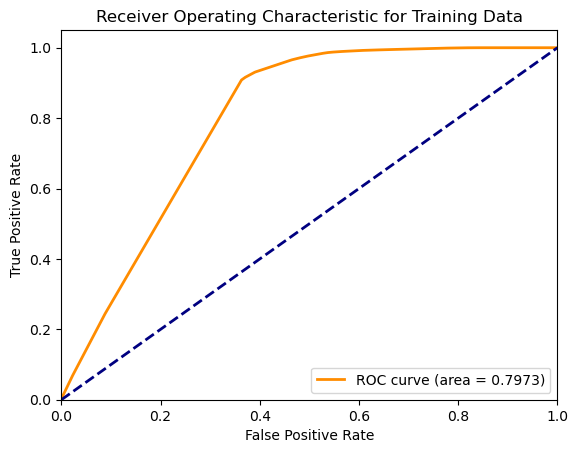

In [34]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

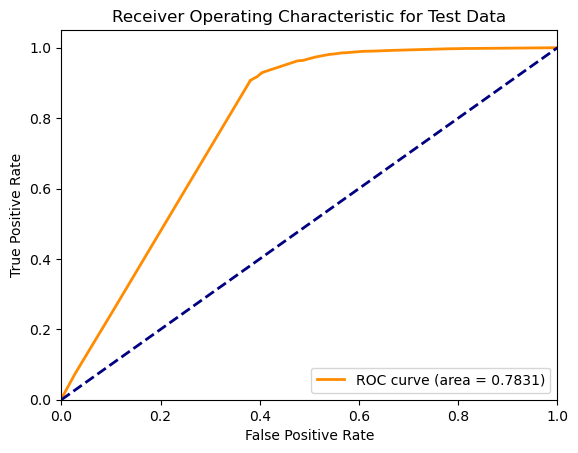

In [35]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


In [36]:
#add three columns

scored_class = dt.predict(X)
scored_probs = dt.predict_proba(X)
prob_fraud = scored_probs[:,0]
prob_legit = scored_probs[:,1]

x_pred = X.copy()

x_pred['label_predict'] = scored_class
x_pred['label_fraud'] = prob_fraud
x_pred['label_legit'] = prob_legit
x_pred

,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,credit_score,ip_address_104.139.239.251,ip_address_104.188.90.250,ip_address_106.45.227.122,ip_address_11.103.114.193,...,regionName_Zurich,continent_Americas,continent_Asia,continent_Europe,continentCode_AM,continentCode_AS,continentCode_EU,label_predict,label_fraud,label_legit
0,34,64,11,11638,True,104,0,0,0,0,...,0,1,0,0,1,0,0,1,0.098519,0.901481
1,27,35,7,11525,True,359,0,0,0,0,...,0,0,0,1,0,0,1,1,0.098519,0.901481
2,44,38,10,9335,True,848,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
3,37,55,11,11521,True,202,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
4,39,35,9,11982,False,739,0,0,0,0,...,0,1,0,0,1,0,0,1,0.368421,0.631579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,27,84,8,12707,True,807,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
9946,30,54,10,10972,True,143,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
9947,25,46,11,8657,True,846,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
9948,29,81,10,9324,True,344,0,0,0,0,...,0,1,0,0,1,0,0,1,0.098519,0.901481


In [ ]:
#with_pred = x_pred['label_predict'], ['label_legit'], ['label_fraud']
#with_pred

In [37]:
pred_df = pd.DataFrame(x_pred)
pred_df


,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,credit_score,ip_address_104.139.239.251,ip_address_104.188.90.250,ip_address_106.45.227.122,ip_address_11.103.114.193,...,regionName_Zurich,continent_Americas,continent_Asia,continent_Europe,continentCode_AM,continentCode_AS,continentCode_EU,label_predict,label_fraud,label_legit
0,34,64,11,11638,True,104,0,0,0,0,...,0,1,0,0,1,0,0,1,0.098519,0.901481
1,27,35,7,11525,True,359,0,0,0,0,...,0,0,0,1,0,0,1,1,0.098519,0.901481
2,44,38,10,9335,True,848,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
3,37,55,11,11521,True,202,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
4,39,35,9,11982,False,739,0,0,0,0,...,0,1,0,0,1,0,0,1,0.368421,0.631579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,27,84,8,12707,True,807,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
9946,30,54,10,10972,True,143,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
9947,25,46,11,8657,True,846,0,0,0,0,...,0,0,1,0,0,1,0,1,0.098519,0.901481
9948,29,81,10,9324,True,344,0,0,0,0,...,0,1,0,0,1,0,0,1,0.098519,0.901481


# Task 4.2- Put Predictions into Customer Table

In [38]:
with_pred = pred_df[['label_predict', 'label_legit', 'label_fraud']]
with_pred

,label_predict,label_legit,label_fraud
0,1,0.901481,0.098519
1,1,0.901481,0.098519
2,1,0.901481,0.098519
3,1,0.901481,0.098519
4,1,0.631579,0.368421
...,...,...,...
9945,1,0.901481,0.098519
9946,1,0.901481,0.098519
9947,1,0.901481,0.098519
9948,1,0.901481,0.098519


In [39]:
full_data = customer_accounts_enriched.merge(with_pred, left_index = True, right_index = True, how = 'left')
full_data

,email_age,customer_tenure,balance_inqury_count,balance_current_amt,current_customer,ip_address,email_domain,business_state,credit_score,EVENT_LABEL,...,countryCode,timeZone,zipCode,cityName,regionName,continent,continentCode,label_predict,label_legit,label_fraud
0,34,64,11,11638,True,99.193.119.75,gmail.com,IA,104,1,...,US,-07:00,90245,El Segundo,California,Americas,AM,1,0.901481,0.098519
1,27,35,7,11525,True,193.63.140.47,gmail.com,NH,359,1,...,GB,+01:00,CF37,Pontypridd,Wales,Europe,EU,1,0.901481,0.098519
2,44,38,10,9335,True,79.182.139.29,gmail.com,NY,848,1,...,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS,1,0.901481,0.098519
3,37,55,11,11521,True,207.148.124.204,gmail.com,NH,202,1,...,SG,+08:00,179431,Singapore,Singapore,Asia,AS,1,0.901481,0.098519
4,39,35,9,11982,False,68.6.93.151,hotmail.com,AK,739,1,...,US,-07:00,93101,Santa Barbara,California,Americas,AM,1,0.631579,0.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,27,84,8,12707,True,79.182.139.29,gmail.com,GA,807,1,...,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS,1,0.901481,0.098519
9946,30,54,10,10972,True,79.182.139.29,gmail.com,SD,143,0,...,IL,+03:00,80600,Mitzpe Ramon,HaDarom,Asia,AS,1,0.901481,0.098519
9947,25,46,11,8657,True,185.48.24.245,gmail.com,CT,846,1,...,TR,+03:00,34080,Istanbul,Istanbul,Asia,AS,1,0.901481,0.098519
9948,29,81,10,9324,True,206.10.194.143,gmail.com,NJ,344,1,...,US,-05:00,60661,Chicago,Illinois,Americas,AM,1,0.901481,0.098519


In [ ]:
#full_data.to_sql('full_customer', con=engine, index=False, if_exists='replace')

# Question 2- Top 5 Predictors

In [41]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
q2 = pd.DataFrame(data = tree_imp,
                  columns = column_values)
q2['feature']=X.columns

#sort data so features with largest importance values are at the top
dfq2 = q2.sort_values(by=['importance'], ascending=False)

print(dfq2)

#Create variable importance plot
plt.figure(figsize=(100, 100))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=dfq2,
            y=dfq2['feature'],
            x=dfq2['importance'], color="lightblue")

plt.show()

     importance                 feature
1      0.288563         customer_tenure
2      0.219792    balance_inqury_count
0      0.189553               email_age
85     0.159936  email_domain_yahoo.com
3      0.079694     balance_current_amt
..          ...                     ...
175    0.000000      latitude_40.833382
174    0.000000      latitude_40.444321
173    0.000000      latitude_40.393444
172    0.000000      latitude_39.966381
532    0.000000        continentCode_EU

[533 rows x 2 columns]


# Close Connections

In [ ]:
# Close the database connection
#engine.dispose()
#print("Connection closed!")